In [130]:
import pandas as pd
import zipfile; import os; import urllib
import lasio; import matplotlib.pyplot as plt; import welly; from welly import Well
% matplotlib inline

In [18]:
## Download and unzip databases from KGS to a temp folder
os.makedirs('./temp', exist_ok=True)
raspath = 'http://www.kgs.ku.edu/PRS/Ora_Archive/ks_elog_scans.zip'
laspath = 'http://www.kgs.ku.edu/PRS/Ora_Archive/ks_las_files.zip'

ras_handle, _ = urllib.request.urlretrieve(raspath)
las_handle, _ = urllib.request.urlretrieve(laspath)

with zipfile.ZipFile(ras_handle,'r') as zip_ras:
    zip_ras.extractall('temp')
with zipfile.ZipFile(las_handle,'r') as zip_las:
    zip_las.extractall('temp')

Elogs is collection of KGS TIFF files; lases is KGS .las files

In [57]:
elogs = pd.read_csv('temp/ks_elog_scans.txt', parse_dates=True)
lases = pd.read_csv('temp/ks_las_files.txt', parse_dates=True)

In [83]:
elogs_mask = elogs['KID'].isin(lases['KGS_ID'])  # Create mask for elogs
both_elog = elogs[elogs_mask] # select items elog that fall in both
both_elog.drop_duplicates('KID') # remove duplicates
print('How many logs fall in both and have unique KGS_ID? '+str(both_elog_unique.shape[0]))
both_elog_unique_new = both_elog_unique.loc['2000-1-1' : '2017-1-1']
both_elog_unique_new;

How many logs fall in both and have unique KGS_ID? 14289


In [84]:
lases_mask = lases['KGS_ID'].isin(elogs['KID'])  # Create mask for elogs
both_lases = lases[las_mask] # select items elog that fall in both
both_lases_unique = both_lases.drop_duplicates('KGS_ID') # remove duplicates
print('Other direction -- how many logs fall in both and have unique KGS_ID? '+str(both_lases_unique.shape[0]))
if both_elog_unique.shape[0] == both_lases_unique.shape[0]:
    print('Same in both directions.')
both_lases_unique;

Other direction -- how many logs fall in both and have unique KGS_ID? 14289
Same in both directions.


Download a random las file, unzip, and render with lasio

In [108]:
# Each time you run this you'll get a new las file, so...
randomlas_line = both_lases_unique.loc['2000-1-1' : '2017-1-1'].sample(n=1)

In [109]:
str(randomlas_line['URL'])
randomlas_line

,KGS_ID,Latitude,Longitude,Location,Operator,Lease,API,Elevation,Elev_Ref,Depth_start,Depth_stop,URL
2013,1044186387,37.405423,-95.67953,"T30S R16E, Sec. 29, SE NE NE SW","A X & P, Inc.",Unit 1 - Wolfe West WW 29-H,15-205-28064,803.0,KB,-5.25,842.0,http://www.kgs.ku.edu/WellLogs/kcc_logs_2014/1...


In [110]:
randomlas_url = randomlas_line['URL'].tolist()[0]
randomlas_dl, _ = urllib.request.urlretrieve(randomlas_url)

with zipfile.ZipFile(randomlas_dl,'r') as zip_randomlas:
    zip_randomlas.extractall('temp')

In [111]:
randomlas_line['KGS_ID'].tolist()[0]

1044186387

## Read in well log and display using welly

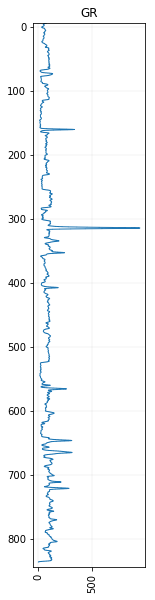

In [144]:
l = Well.from_las('temp/1044249438.las') # hardcoded until I figure out how to get filename
l.data['GR'];
# l.plot(tracks = [['GR','NEU']]);
l.data['GR'].plot(lw=0.5)

### Next steps:
+ Connect tiff files (format) with log curves from lases -- will need to use welly dictionary (?)
+ Create function to download a random subset of paired las / tiff files
+ Parameters: Number of files to download; date range
+ Returns: consistently named, paired training data